load the standard Wisconsin Breast Cancer dataset (the same one used in UCI and available via sklearn)

In [5]:
# Cell 1: load & preview
import pandas as pd
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # 0 = malignant, 1 = benign

print("Shape:", df.shape)
print("\nColumns:", list(df.columns))
print("\nTarget value counts:")
print(df['target'].value_counts(), "\n")

print("First 5 rows:")
display(df.head())


Shape: (569, 31)

Columns: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'target']

Target value counts:
target
1    357
0    212
Name: count, dtype: int64 

First 5 rows:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


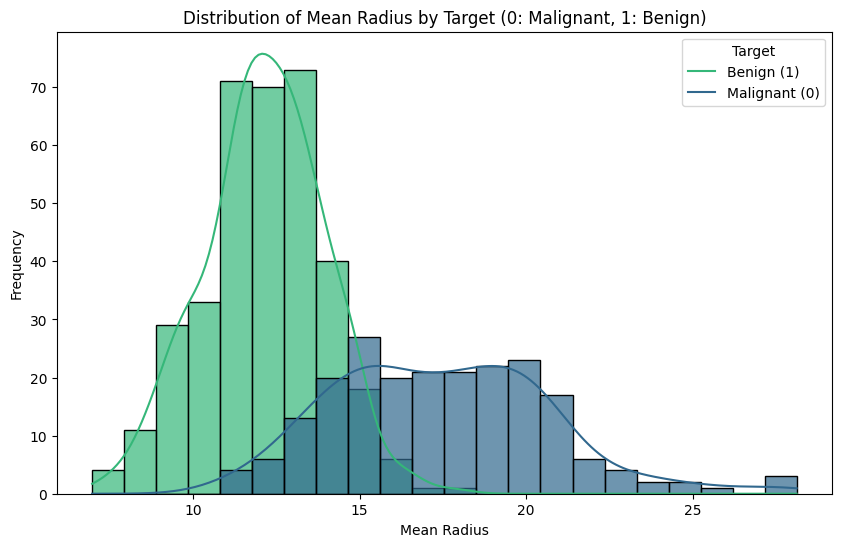

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='mean radius', hue='target', kde=True, palette='viridis', alpha=0.7)
plt.title('Distribution of Mean Radius by Target (0: Malignant, 1: Benign)')
plt.xlabel('Mean Radius')
plt.ylabel('Frequency')
plt.legend(title='Target', labels=['Benign (1)', 'Malignant (0)'], loc='upper right')
plt.show()

In [7]:
import numpy as np

# Choose a feature: 'mean radius'
feature_name = 'mean radius'

# Discretize the feature into two categories: high and low
mean_radius_threshold = df[feature_name].mean()
df['radius_category'] = df[feature_name].apply(lambda x: 'high' if x > mean_radius_threshold else 'low')

# Define the target variable: 'target' (0 = malignant, 1 = benign)

# 1. Calculate Prior Probabilities
P_malignant = (df['target'] == 0).mean() # P(Malignant)
P_benign = (df['target'] == 1).mean()   # P(Benign)

print(f"P(Malignant): {P_malignant:.4f}")
print(f"P(Benign): {P_benign:.4f}\n")

# 2. Calculate Likelihoods
# P(radius_high | Malignant)
P_radius_high_given_malignant = df[(df['target'] == 0) & (df['radius_category'] == 'high')].shape[0] / df[df['target'] == 0].shape[0]

# P(radius_high | Benign)
P_radius_high_given_benign = df[(df['target'] == 1) & (df['radius_category'] == 'high')].shape[0] / df[df['target'] == 1].shape[0]

print(f"P(radius_high | Malignant): {P_radius_high_given_malignant:.4f}")
print(f"P(radius_high | Benign): {P_radius_high_given_benign:.4f}\n")

# 3. Calculate Evidence P(radius_high)
# P(radius_high) = P(radius_high | Malignant) * P(Malignant) + P(radius_high | Benign) * P(Benign)
P_radius_high = P_radius_high_given_malignant * P_malignant + P_radius_high_given_benign * P_benign

print(f"P(radius_high): {P_radius_high:.4f}\n")

# 4. Calculate Posterior Probability P(Malignant | radius_high)
# P(Malignant | radius_high) = [P(radius_high | Malignant) * P(Malignant)] / P(radius_high)
if P_radius_high > 0:
    P_malignant_given_radius_high = (P_radius_high_given_malignant * P_malignant) / P_radius_high
else:
    P_malignant_given_radius_high = 0 # the evidence never occurs, there is no posterior

print(f"Posterior Probability P(Malignant | radius_high): {P_malignant_given_radius_high:.4f}")

P(Malignant): 0.3726
P(Benign): 0.6274

P(radius_high | Malignant): 0.8491
P(radius_high | Benign): 0.1289

P(radius_high): 0.3972

Posterior Probability P(Malignant | radius_high): 0.7965


## Load UCI Heart Disease Dataset

Load the UCI Heart Disease dataset into a new pandas DataFrame and inspect its initial structure.


In [9]:
import pandas as pd

# URL for the UCI Heart Disease dataset (Cleveland)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Column names for the dataset (as it doesn't have a header)
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# Load the dataset, specifying no header and providing column names
df_heart = pd.read_csv(url, names=column_names, na_values='?')

# The original 'target' column has values 0, 1, 2, 3, 4. Convert to binary: 0 for no disease, 1 for disease.
df_heart['target'] = df_heart['target'].apply(lambda x: 1 if x > 0 else 0)

print("First 5 rows of df_heart:")
display(df_heart.head())

print(f"\nShape of df_heart: {df_heart.shape}")

print("\nConcise summary of df_heart:")
df_heart.info()

First 5 rows of df_heart:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0



Shape of df_heart: (303, 14)

Concise summary of df_heart:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


## Preprocess Data for Bayesian Network

Select at least three features (e.g., 'age', 'chest pain type' (cp), 'resting blood pressure' (trestbps)) and the target variable ('target' - presence of heart disease). Discretize continuous features if necessary and prepare the data for use with the pgmpy library.


In [10]:
selected_features = ['age', 'cp', 'trestbps', 'target', 'ca', 'thal']
df_pgm = df_heart[selected_features].copy()

# Handle missing values by dropping rows with NaN in the selected features
df_pgm.dropna(inplace=True)

print(f"Shape after dropping NaNs: {df_pgm.shape}")
print("First 5 rows of df_pgm after initial selection and NaN handling:")
display(df_pgm.head())

Shape after dropping NaNs: (297, 6)
First 5 rows of df_pgm after initial selection and NaN handling:


,age,cp,trestbps,target,ca,thal
0,63.0,1.0,145.0,0,0.0,6.0
1,67.0,4.0,160.0,1,3.0,3.0
2,67.0,4.0,120.0,1,2.0,7.0
3,37.0,3.0,130.0,0,0.0,3.0
4,41.0,2.0,130.0,0,0.0,3.0


Discretize the 'age' and 'trestbps' columns, and then convert relevant columns to categorical data types to prepare the data for the pgmpy library.



In [11]:
import numpy as np

# Discretize 'age' into 3 bins: young, middle, old
# Using qcut to create bins of approximately equal size based on quantiles
df_pgm['age_bins'] = pd.qcut(df_pgm['age'], q=3, labels=['young', 'middle', 'old'], precision=0)

# Discretize 'trestbps' into 3 bins: low, normal, high
# Using cut with custom bins based on common blood pressure categories
bins_trestbps = [df_pgm['trestbps'].min() - 1, 120, 140, df_pgm['trestbps'].max() + 1]
labels_trestbps = ['normal', 'elevated', 'high'] # Simplified categories
df_pgm['trestbps_bins'] = pd.cut(df_pgm['trestbps'], bins=bins_trestbps, labels=labels_trestbps, right=False)

# Convert categorical columns to 'category' dtype
for col in ['age_bins', 'trestbps_bins', 'cp', 'ca', 'thal', 'target']:
    df_pgm[col] = df_pgm[col].astype('category')

print("Data types after discretization and conversion:")
print(df_pgm.dtypes)
print("\nValue counts for 'age_bins':")
print(df_pgm['age_bins'].value_counts())
print("\nValue counts for 'trestbps_bins':")
print(df_pgm['trestbps_bins'].value_counts())

print("\nFirst 5 rows of df_pgm after discretization and type conversion:")
display(df_pgm.head())

Data types after discretization and conversion:
age               float64
cp               category
trestbps          float64
target           category
ca               category
thal             category
age_bins         category
trestbps_bins    category
dtype: object

Value counts for 'age_bins':
age_bins
young     104
middle    102
old        91
Name: count, dtype: int64

Value counts for 'trestbps_bins':
trestbps_bins
elevated    139
high         98
normal       60
Name: count, dtype: int64

First 5 rows of df_pgm after discretization and type conversion:


,age,cp,trestbps,target,ca,thal,age_bins,trestbps_bins
0,63.0,1.0,145.0,0,0.0,6.0,old,high
1,67.0,4.0,160.0,1,3.0,3.0,old,high
2,67.0,4.0,120.0,1,2.0,7.0,old,elevated
3,37.0,3.0,130.0,0,0.0,3.0,young,elevated
4,41.0,2.0,130.0,0,0.0,3.0,young,elevated


## Build and Visualize Bayesian Network

### Subtask:
Construct a small Bayesian network using the selected features and the `pgmpy` library. Define the network structure by specifying dependencies (features influencing the target). Learn the parameters (Conditional Probability Tables) from the preprocessed data. Finally, visualize the network graph and provide a screenshot.


In [15]:
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator

# 2. Define the edges of your Bayesian network
# Example dependencies: Features influencing target, and age influencing blood pressure.
model_edges = [
    ('age_bins', 'trestbps_bins'),
    ('age_bins', 'target'),
    ('cp', 'target'),
    ('trestbps_bins', 'target'),
    ('ca', 'target'),
    ('thal', 'target')
]

# 3. Instantiate a DiscreteBayesianNetwork object with the defined edges
bn_model = DiscreteBayesianNetwork(model_edges)

# 4. Fit the model parameters (Conditional Probability Distributions)
# Use MaximumLikelihoodEstimator on the preprocessed df_pgm DataFrame
bn_model.fit(df_pgm[['age_bins', 'trestbps_bins', 'cp', 'ca', 'thal', 'target']], estimator=MaximumLikelihoodEstimator)

print("Bayesian Network structure defined and parameters learned successfully.")
print("Nodes:", bn_model.nodes())
print("Edges:", bn_model.edges())

Bayesian Network structure defined and parameters learned successfully.
Nodes: ['age_bins', 'trestbps_bins', 'target', 'cp', 'ca', 'thal']
Edges: [('age_bins', 'trestbps_bins'), ('age_bins', 'target'), ('trestbps_bins', 'target'), ('cp', 'target'), ('ca', 'target'), ('thal', 'target')]



The previous steps successfully built and learned the Bayesian Network. Now, to complete the subtask, we visualize the network graph, adding labels for clarity



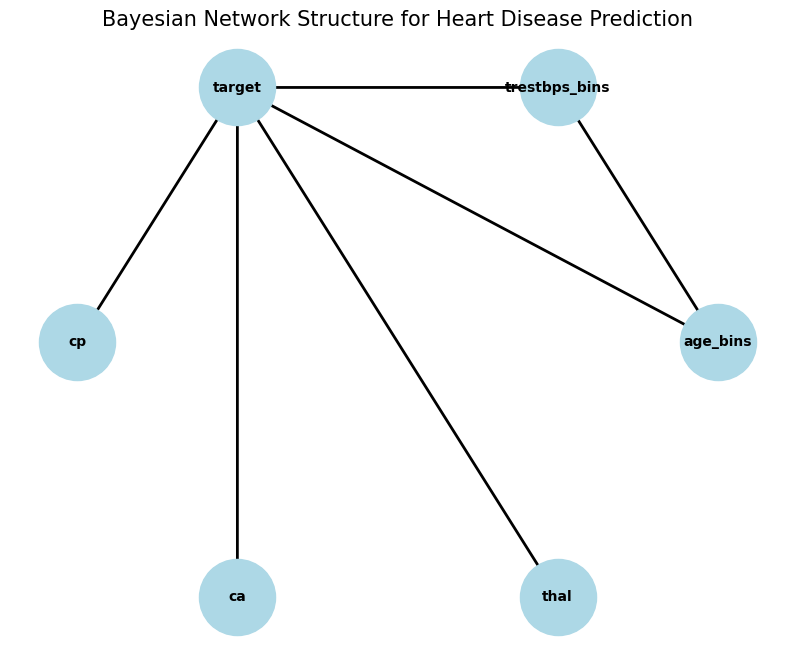

Bayesian Network graph visualized successfully. Please take a screenshot.


In [16]:
import matplotlib.pyplot as plt
import networkx as nx

# 5. Convert the BayesianNetwork model to a NetworkX graph
nx_graph = nx.DiGraph(bn_model.edges())

# Prepare node positions for better visualization (optional but improves readability)
pos = nx.circular_layout(nx_graph)

plt.figure(figsize=(10, 8))

# Draw nodes
nx.draw_networkx_nodes(nx_graph, pos, node_size=3000, node_color='lightblue')

# Draw edges
nx.draw_networkx_edges(nx_graph, pos, arrowsize=20, arrowstyle='->', width=2)

# Draw node labels
nx.draw_networkx_labels(nx_graph, pos, font_size=10, font_weight='bold')

# Set title
plt.title('Bayesian Network Structure for Heart Disease Prediction', size=15)
plt.axis('off') # Hide axes
plt.show()

print("Bayesian Network graph visualized successfully. Please take a screenshot.")

## Demonstrate Inference with Bayesian Network

### Subtask:
Show how the built Bayesian network can be used to predict or infer the risk of heart disease given specific evidence for one or more features. For example, calculate the probability of heart disease given certain age and chest pain type.


In [17]:
from pgmpy.inference import VariableElimination

# 1. Instantiate the VariableElimination inference engine
infer = VariableElimination(bn_model)

# 2. Define a query for P(target | age_bins='young', cp='1.0')
print("Probability of heart disease given age = 'young' and cp = '1.0':")
query1 = infer.query(variables=['target'], evidence={'age_bins': 'young', 'cp': 1.0})
print(query1)

# 3. Define another query for P(target | age_bins='old', cp='4.0')
print("\nProbability of heart disease given age = 'old' and cp = '4.0':")
query2 = infer.query(variables=['target'], evidence={'age_bins': 'old', 'cp': 4.0})
print(query2)


Probability of heart disease given age = 'young' and cp = '1.0':
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.5131 |
+-----------+---------------+
| target(1) |        0.4869 |
+-----------+---------------+

Probability of heart disease given age = 'old' and cp = '4.0':
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.3818 |
+-----------+---------------+
| target(1) |        0.6182 |
+-----------+---------------+


In [19]:
from pgmpy.inference import VariableElimination

# Re-instantiate the inference engine if it's not available in the current kernel state
# (This is good practice for reproducibility in interactive environments)
if 'infer' not in locals():
    infer = VariableElimination(bn_model)

# Define a new query for P(target | cp, thal)
# Let's choose cp=4.0 (asymptomatic) and thal=7.0 (fixed defect)
print("\nProbability of heart disease given cp = 4.0 and thal = 7.0:")
query4 = infer.query(variables=['target'], evidence={'cp': 4.0, 'thal': 7.0})
print(query4)

# Another query: cp=1.0 (typical angina) and thal=3.0 (normal)
print("\nProbability of heart disease given cp = 1.0 and thal = 3.0:")
query5 = infer.query(variables=['target'], evidence={'cp': 1.0, 'thal': 3.0})
print(query5)


Probability of heart disease given cp = 4.0 and thal = 7.0:
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.2610 |
+-----------+---------------+
| target(1) |        0.7390 |
+-----------+---------------+

Probability of heart disease given cp = 1.0 and thal = 3.0:
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.6070 |
+-----------+---------------+
| target(1) |        0.3930 |
+-----------+---------------+


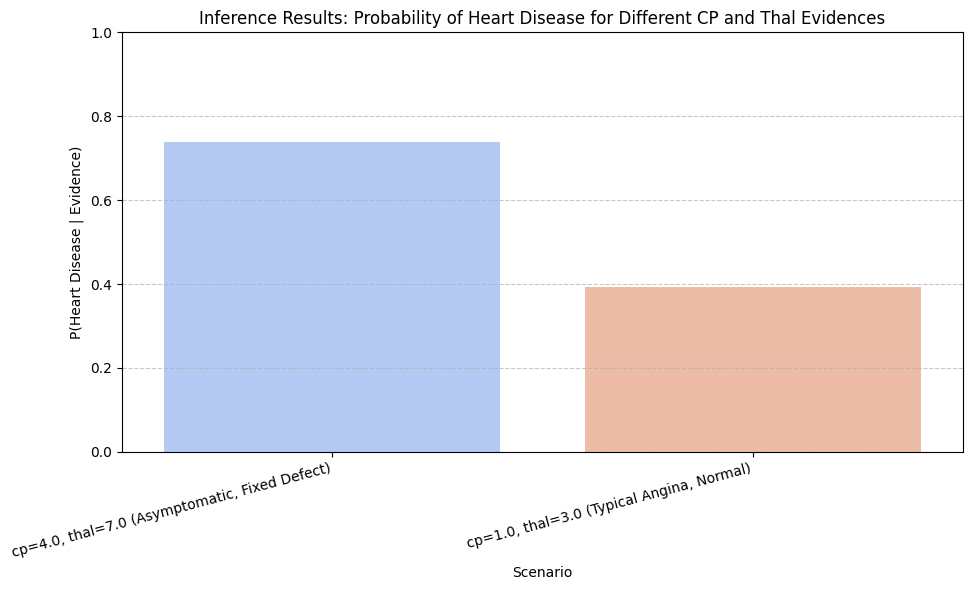

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract posterior probabilities for target=1 (disease)
disease_prob_cp4_thal7 = query4.values[1] # P(target=1 | cp=4.0, thal=7.0)
disease_prob_cp1_thal3 = query5.values[1] # P(target=1 | cp=1.0, thal=3.0)

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Scenario': ['cp=4.0, thal=7.0 (Asymptomatic, Fixed Defect)', 'cp=1.0, thal=3.0 (Typical Angina, Normal)'],
    'Probability of Heart Disease (Target=1)': [disease_prob_cp4_thal7, disease_prob_cp1_thal3]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Scenario', y='Probability of Heart Disease (Target=1)', hue='Scenario', data=plot_data, palette='coolwarm', legend=False)
plt.title('Inference Results: Probability of Heart Disease for Different CP and Thal Evidences')
plt.ylabel('P(Heart Disease | Evidence)')
plt.ylim(0, 1) # Probability ranges from 0 to 1
plt.xticks(rotation=15, ha='right') # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [18]:
from pgmpy.inference import VariableElimination

# Re-instantiate the inference engine if it's not available in the current kernel state
# (This is good practice for reproducibility in interactive environments)
if 'infer' not in locals():
    infer = VariableElimination(bn_model)

# Define a new query for P(target | age_bins='middle', trestbps_bins='high')
print("\nProbability of heart disease given age = 'middle' and trestbps = 'high':")
query3 = infer.query(variables=['target'], evidence={'age_bins': 'middle', 'trestbps_bins': 'high'})
print(query3)


Probability of heart disease given age = 'middle' and trestbps = 'high':
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.5215 |
+-----------+---------------+
| target(1) |        0.4785 |
+-----------+---------------+
